In [2]:
import pandas as pd
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

## importing the data

In [3]:
df = pd.read_csv(r"C:\Users\reddy\Downloads\spam.csv")

In [4]:
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [5]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
ham_words = " ".join(df[df["Category"] == "ham"]["Message"].values)

In [7]:
ham_words

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat... Ok lar... Joking wif u oni... U dun say so early hor... U c already then say... Nah I don\'t think he goes to usf, he lives around here though Even my brother is not like to speak with me. They treat me like aids patent. As per your request \'Melle Melle (Oru Minnaminunginte Nurungu Vettam)\' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune I\'m gonna be home soon and i don\'t want to talk about this stuff anymore tonight, k? I\'ve cried enough today. I\'ve been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times. I HAVE A DATE ON SUNDAY WITH WILL!! Oh k...i\'m watching here:) Eh u remember how 2 spell his name... Yes i did. He v naughty make until i v wet. Fine if that\x92s the way u feel. That\x92s th

In [8]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [9]:
from wordcloud import WordCloud

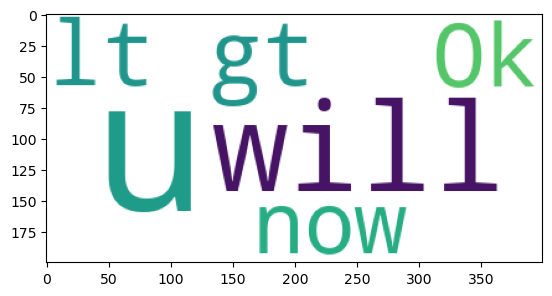

In [10]:
ham_plot = WordCloud(max_words = 5,background_color="white").generate(ham_words)
plt.imshow(ham_plot)

### Spam words

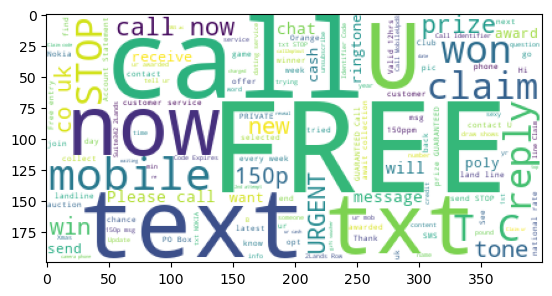

In [11]:
spam_words = " ".join(df[df["Category"] == "spam"]["Message"].values)
spam_plot = WordCloud(background_color= "white").generate(spam_words)
plt.imshow(spam_plot)

In [12]:
spam_words

'Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C\'s apply 08452810075over18\'s FreeMsg Hey there darling it\'s been 3 week\'s now and no word back! I\'d like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only. Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with camera for Free! Call The Mobile Update Co FREE on 08002986030 SIX chances to win CASH! From 100 to 20,000 pounds txt> CSH11 and send to 87575. Cost 150p/day, 6days, 16+ TsandCs apply Reply HL 4 info URGENT! You have won a 1 week FREE membership in our £100,000 Prize Jackpot! Txt the word: CLAIM to No: 81010 T&C www.dbuk.net LCCLTD POBOX 4403LDNW1A7RW18 XXXMobileMovieClub: To use your credit, click the WAP link in the next txt message o

<Axes: xlabel='Category'>

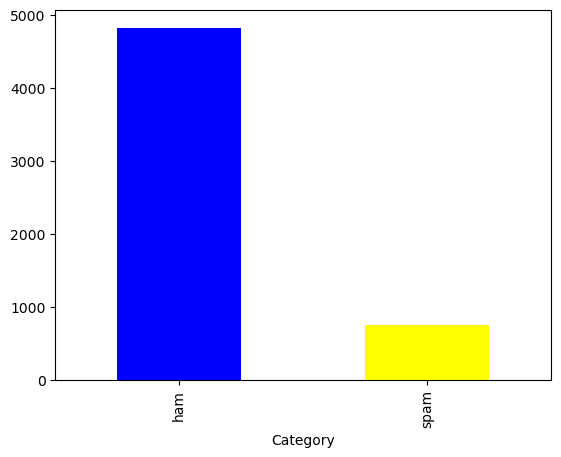

In [13]:
df["Category"].value_counts().plot(kind = "bar",color = ["blue","yellow"])

### bag of words

In [14]:
bow = CountVectorizer(stop_words="english")

In [15]:
bow.fit(df["Message"])
x = bow.transform(df["Message"]).toarray()
y = df["Category"]

In [16]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=23)

In [41]:
import pickle

In [43]:
pickle.dump(bow,open("bow.pkl","wb"))

In [44]:
model = pickle.load(open("bow.pkl","rb"))

## knn

In [17]:
from sklearn.metrics import accuracy_score

In [18]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
accuracy_score(y_test,y_pred)

0.9022421524663677

## naive Bayes

In [19]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(x_train,y_train)
y_pred = nb.predict(x_test)
accuracy_score(y_test,y_pred)

0.9820627802690582

In [29]:
import pickle

In [38]:
pickle.dump(nb,open("nb.pkl","wb"))

In [39]:
model = pickle.load(open("nb.pkl","rb"))

In [40]:
model

MultinomialNB()

## Decision tree 

In [20]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
y_pred = dtc.predict(x_test)
accuracy_score(y_test,y_pred)

0.9623318385650225

## SVC

In [21]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train,y_train)
y_pred = svc.predict(x_test)
accuracy_score(y_test,y_pred)

0.9775784753363229

## logistic regression

In [22]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
accuracy_score(y_test,y_pred)

0.9820627802690582

## Deployment

In [24]:
email = input("Enter the email :")
data = bow.transform([email]).toarray()
nb.predict(data)

Enter the email :wow congratulations


array(['spam'], dtype='<U4')